In [1]:
import glob
import cv2
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
df = np.array([0])
df = pd.DataFrame(df)

df_centre = np.array([0])
df_centre = pd.DataFrame(df_centre)

count = 0 
count_centre = 0

mag_count = 0
ang_count = 0

df_mag = np.array([0])
df_mag = pd.DataFrame(df_mag)

df_ang = np.array([0])
df_ang = pd.DataFrame(df_ang)

In [3]:
__clip = "C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/"

#actionClasses = ['Diving-Side','Golf-Swing-Back','Golf-Swing-Front','Golf-Swing-Side','Kicking-Front','Kicking-Side','Lifting','Riding-Horse','Run-Side','SkateBoarding-Front','Swing-Bench','Swing-SideAngle','Walk-Front']

actionClasses = ['GolfSwing']
clip1 = list()
clip = list()
for i in range(len(actionClasses)):
    clip1.append( __clip + actionClasses[i] + "/*.avi")
    clip.append(sorted(glob.glob(clip1[i])))
print(clip[0])

['C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/GolfSwing\\v_GolfSwing_g19_c05.avi', 'C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/GolfSwing\\v_GolfSwing_g19_c06.avi', 'C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/GolfSwing\\v_GolfSwing_g20_c01.avi', 'C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/GolfSwing\\v_GolfSwing_g20_c02.avi', 'C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/GolfSwing\\v_GolfSwing_g20_c03.avi', 'C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/GolfSwing\\v_GolfSwing_g20_c04.avi', 'C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/GolfSwing\\v_GolfSwing_g20_c05.avi', 'C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/GolfSwing\\v_GolfSwing_g20_c06.avi', 'C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/GolfSwing\\v_GolfSwing_g20_c07.avi', 'C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/GolfSwing\\v_GolfSwing_g21_c01.avi', 'C:/Users/badajena/

In [4]:
def convertDataframe(vector,i,k):
    global df,count, count_centre,df_centre
    
    a = pd.DataFrame(np.array([[]]))
    
    if i==0:
        vector = np.array(vector)
        df1 = pd.DataFrame(vector)

        if k == 0:
            df = df1
            count = 1

        else:
            df = pd.concat([df,df1], axis = 1)        

    if i==1:
        vector = np.array(vector)
        df1 = pd.DataFrame(vector)

        if k == 0:
            df = a
            df_centre = df1
            count_centre = 1
            #print("######################################################################")

        if k == 1:
            df = a
            df_centre = pd.concat([df_centre,df1], axis = 1)  
            

In [5]:
def normalize(array,i):
    array = np.array(array)
    maximum = np.amax(array)
    #print(maximum)
    if i==0:
        #print (array / maximum * 360)
        return (array / maximum * 360)
    else:
        #print(array / maximum * 360)
        return (array / maximum * 360)

In [6]:
def createCSV(df_,i,k):
    global df_ang, mag_count,ang_count,df_mag
        
    a = pd.DataFrame(np.array([[]]))    
   
    #actionClasses = ['Diving-Side','Golf-Swing-Back','Golf-Swing-Front','Golf-Swing-Side','Kicking-Front','Kicking-Side','Lifting','Riding-Horse','Run-Side','SkateBoarding-Front','Swing-Bench','Swing-SideAngle','Walk-Front']
    actionClasses = ['GolfSwing']
    list_dataframes = "C:/Users/badajena/Desktop/TEST/"
    a = pd.DataFrame(np.array([[]]))
    
    list_dataframes_mag = list_dataframes + actionClasses[i] +"-mag.csv"
    list_dataframes_ang = list_dataframes + actionClasses[i] +"-ang.csv"
    if k == 1:
        df_.to_csv(list_dataframes_mag)
        df_mag = a
        mag_count = 0
    if k == 0:
        df_.to_csv(list_dataframes_ang)
        df_ang = a
        ang_count = 0
   

In [7]:
def convertMagAng(vector,i,k):
    global df_ang, mag_count,ang_count,df_mag

    
    if i==0:
        vector = np.array(vector)
        df1 = pd.DataFrame(vector)

        if k == 0:
            df_mag = df1
            mag_count = 1

        else:
            df_mag = pd.concat([df_mag,df1], axis = 1)        

    if i==1:
        vector = np.array(vector)
        df1 = pd.DataFrame(vector)

        if k == 0:
            df_ang = df1
            ang_count = 1
            #print("######################################################################")

        if k == 1:
            df_ang = pd.concat([df_ang,df1], axis = 1)  
            

In [8]:
clip[0][0]

'C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/GolfSwing\\v_GolfSwing_g19_c05.avi'

end of video  0
(5, 32) (57, 32)
[ 9 11 39 41 42]
end of video  1
(5, 32) (58, 32)
[ 7 16 28 35 46]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  2
(5, 32) (45, 32)
[14 21 28 38 43]
end of video  3
(5, 32) (30, 32)
[ 1  2 14 24 28]
end of video  4
(5, 32) (23, 32)
[ 2 14 15 18 20]
end of video  5
(5, 32) (24, 32)
[ 2 12 14 20 22]
end of video  6
(5, 32) (43, 32)
[ 0  6  8 19 36]
end of video  7
(5, 32) (47, 32)
[ 4 15 18 35 44]
end of video  8
(5, 32) (26, 32)
[ 2  4 10 20 22]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  9
(5, 32) (31, 32)
[ 0  1  2 21 29]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  10
(5, 32) (19, 32)
[ 4  6  7 11 16]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  11
(5, 32) (21, 32)
[ 0  4  5 13 17]
end of video  12
(5, 32) (33, 32)
[ 6 16 18 24 26]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  13
(5, 32) (38, 32)
[ 6 11 19 30 34]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  14
(5, 32) (29, 32)
[ 1  5  6 12 27]
end of video  15
(5, 32) (49, 32)
[ 5 11 12 16 31]
end of video  16
(5, 32) (48, 32)
[11 16 17 29 40]
end of video  17
(5, 32) (54, 32)
[15 17 22 30 36]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  18
(5, 32) (39, 32)
[ 4  5 28 29 31]
end of video  19
(5, 32) (30, 32)
[ 1  2  9 17 20]
end of video  20
(5, 32) (19, 32)
[ 1  4  9 10 11]
end of video  21
(5, 32) (40, 32)
[ 4 18 23 24 30]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  22
(5, 32) (33, 32)
[ 6  9 24 27 32]
end of video  23
(5, 32) (29, 32)
[19 21 23 25 27]
end of video  24
(5, 32) (25, 32)
[ 1  2 12 20 21]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  25
(5, 32) (48, 32)
[ 5 15 21 35 42]
end of video  26
(5, 32) (57, 32)
[ 8 36 38 41 53]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  27
(5, 32) (28, 32)
[ 4  8  9 18 26]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  28
(5, 32) (29, 32)
[10 11 14 17 19]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  29
(5, 32) (31, 32)
[ 4 17 21 22 28]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  30
(5, 32) (32, 32)
[ 4  6 19 23 31]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  31
(5, 32) (32, 32)
[ 0 16 25 28 29]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  32
(5, 32) (15, 32)
[ 0  1  5 13 14]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  33
(5, 32) (21, 32)
[ 3  7 12 15 16]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  34
(5, 32) (29, 32)
[ 4 15 17 19 26]
end of video  35
(5, 32) (32, 32)
[ 0 16 23 27 30]
end of video  36
(5, 32) (25, 32)
[ 7 10 14 18 21]
end of video  37
(5, 32) (28, 32)
[ 6 10 14 19 21]
end of video  38
(5, 32) (25, 32)
[ 1  3  7 15 19]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  39
(5, 32) (24, 32)
[ 0  9 17 20 22]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  40
(5, 32) (25, 32)
[ 1  5 13 16 22]


c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\badajena\anaconda3\envs\tensorflow_env\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


end of video  41
(5, 32) (31, 32)
[ 9 12 19 20 29]
END OF CLASS 0


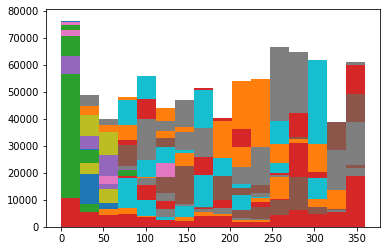

In [9]:

for i in range(1):
    for k in range(len(clip[i])):
        cap = cv2.VideoCapture(clip[i][k])
        ret, frame1 = cap.read()
        prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
        while(1):
            for j in range(5):
                ret, frame2 = cap.read()
            if frame2 is None:
                print('end of video ', k)
                break
            next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
            flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
            mag = mag.flatten()
            ang = ang.flatten()

            ang = normalize(ang,0)
            mag = normalize(mag,1)

            mag = plt.hist(mag, bins=16)
            ang = plt.hist(ang, bins=16)
            #plt.show()

            vector = np.concatenate((mag[0],ang[0]),axis=0)

            #print(vector)
            convertDataframe(vector,0,count)

            if i == len(clip):
                k = cv2.waitKey(30) & 0xff
                if k == 27:
                    break
                elif k == ord('s'):
                    cv2.imwrite('opticalfb.png',frame2)
                    cv2.imwrite('opticalhsv.png',bgr)

            prvs = next
        df_transpose = df.transpose()
        kmeans = KMeans(n_clusters=5, random_state=0).fit(df_transpose)
        centers=kmeans.cluster_centers_
        centers = np.array(centers)
        print(np.shape(centers),np.shape(np.transpose(np.array(df))))
        
        closest, _ = pairwise_distances_argmin_min(centers,np.transpose(np.array(df)))
        closest = np.sort(closest)
        print(closest)
        
        #print(np.shape(centers))
       #print("#######################################################################",centers)
        convertDataframe(closest,1,count_centre)
    print("END OF CLASS",i)
    #createCSV(df_centre,i)
    cap.release()
    #cv2.destroyAllWindows()

In [10]:
X = np.array(df_centre.T)
X = 5*X + 1
X = X.flatten()

__clip = "C:/Users/badajena/Desktop/CodeCheck/CHOSEN_ONES/Testing UCF/"

#actionClasses = ['Diving-Side','Golf-Swing-Back','Golf-Swing-Front','Golf-Swing-Side','Kicking-Front','Kicking-Side','Lifting','Riding-Horse','Run-Side','SkateBoarding-Front','Swing-Bench','Swing-SideAngle','Walk-Front']

actionClasses = ['GolfSwing']
clip1 = list()
clip = list()
for i in range(len(actionClasses)):
    clip1.append( __clip + actionClasses[i] + "/*.avi")
    clip.append(sorted(glob.glob(clip1[i])))
#print(clip[0])

ctr2 = 0
for i in range(1):
    for k in range(len(clip[i])):
        ctr1 = 1
        cap = cv2.VideoCapture(clip[i][k])
        ret, frame1 = cap.read()
        prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
        print(k,len(clip[i]))
        while(1):
            if ctr2 + 1 < len(X):
                if frame1 is None:
                    print('end of video ', k)
                    break
                #print("8=**********************************")    
                for j in range(5):
                    ret, frame1 = cap.read()
                ctr1 = ctr1 + 5
                print("((((((((((((((((((((((((((((ctr1))))))))))))))))))))))))))))",ctr1,ctr2,X[ctr2])

                if X[ctr2] == 1:
                    if ctr2 + 1 < len(X):
                        ctr2 = ctr2 + 1
                if X[ctr2] == ctr1:                
                    next = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
                    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
                    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
                    mag = mag.flatten()
                    convertMagAng(mag,0,mag_count)
                    ang = ang.flatten()
                    convertMagAng(ang,1,ang_count)
                    #plt.imshow(frame1)
                    #plt.show() 
                    ctr2 = ctr2 + 1
                    print("--------------------------------------------------",ctr2,ctr1)

                prvs = next
                #print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!") 
            else:
                break
    print("END OF A CLASS",i)
    print(np.shape(df_ang),np.shape(df_mag))
    createCSV(df_ang,i,0)
    createCSV(df_mag,i,1)
    print(np.shape(df_ang),np.shape(df_mag))




0 42
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))))))) 6 0 46
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))))))) 11 0 46
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))))))) 16 0 46
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))))))) 21 0 46
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))))))) 26 0 46
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))))))) 31 0 46
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))))))) 36 0 46
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))))))) 41 0 46
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))))))) 46 0 46
-------------------------------------------------- 1 46
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))))))) 51 1 56
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))))))) 56 1 56
-------------------------------------------------- 2 56
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))))))) 61 2 196
((((((((((((((((((((((((((((ctr1)))))))))))))))))))))))

In [11]:
X

array([ 46,  56, 196, 206, 211,  36,  81, 141, 176, 231,  71, 106, 141,
       191, 216,   6,  11,  71, 121, 141,  11,  71,  76,  91, 101,  11,
        61,  71, 101, 111,   1,  31,  41,  96, 181,  21,  76,  91, 176,
       221,  11,  21,  51, 101, 111,   1,   6,  11, 106, 146,  21,  31,
        36,  56,  81,   1,  21,  26,  66,  86,  31,  81,  91, 121, 131,
        31,  56,  96, 151, 171,   6,  26,  31,  61, 136,  26,  56,  61,
        81, 156,  56,  81,  86, 146, 201,  76,  86, 111, 151, 181,  21,
        26, 141, 146, 156,   6,  11,  46,  86, 101,   6,  21,  46,  51,
        56,  21,  91, 116, 121, 151,  31,  46, 121, 136, 161,  96, 106,
       116, 126, 136,   6,  11,  61, 101, 106,  26,  76, 106, 176, 211,
        41, 181, 191, 206, 266,  21,  41,  46,  91, 131,  51,  56,  71,
        86,  96,  21,  86, 106, 111, 141,  21,  31,  96, 116, 156,   1,
        81, 126, 141, 146,   1,   6,  26,  66,  71,  16,  36,  61,  76,
        81,  21,  76,  86,  96, 131,   1,  81, 116, 136, 151,  3